<a href="https://colab.research.google.com/github/marcelofenerich/Simple_Analysis/blob/main/AirbnbxTurismo_Rio_De_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

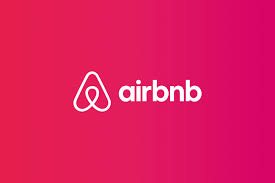

Airbnb se tornou umas das principais redes hoteleiras no mundo, sem ter um hotel!
Com mais de 4 milhões hosts, a empresa tem sido opção para muitos que querem achar um lugar para aconchegante para tirar o seus descanço e aproveitar a região.

Este notebook tem o **objetivo de analisar os dados e tirar insights sobre ele**, principalmente responder uma pergunta, **Qual é o melhor lugar para se hospedar?**,com base na minha analise.

# Rio de Janeiro
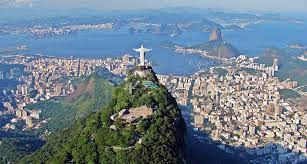

Rio de Janeiro, a Cidade Maravilhosa, musa de diversos musicos, poetas e compositores.

Conhecida por suas favelas e praias, a Cidade Maravilhosa tem uma vida boemia bem agitada e diversos pontos turisticos espalhados pelo seus 1.200 km².

A segunda cidade mais visitada do Brasil, só perde para São Paulo, Rio de Janeiro recebeu mais 650 mil pessoas em todo ano de 2022, com isso iremos analisar aonde os visitantes consutam se hospedar, entendermos os que eles procuram, em termos de localização, trazer os maiores e os menores custos e conforme vou analisando mais perguntas irão aparecer.

In [48]:
## Bibliotecas necessarias para analise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from folium import plugins
import folium
%matplotlib inline

##Obtendo os Dados

Antes de mais nada os dados são retirados do portal  [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

In [ ]:
# Base de dados em CV exportada direto da URL do portal
df=pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-03-28/visualisations/listings.csv')
#df=pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-03-28/data/listings.csv.gz')


**Dicionário das variáveis**
* `id`	- número gerado para a identificação do imóvel
* `name` - nome do imóvel anunciado
* `host_id`	- número gerado para a identificação do proprietário do imóvel
* `host_name`	- nome do anfitrião
* `neighbourhood_group`	- grupo do bairro
* `neighbourhood`	- nome do bairro 
* `latitude`	- coordenada da latitude do imóvel
* `longitude`	- coordenada da longitude do imóvel
* `room_type`	- tipo de quarto anunciado
* `price`	- preço do aluguel do imóvel
* `minimum_nights`	- quantidade mínima de noites para reservar
* `number_of_reviews`	- número de reviews
* `last_review`	- data do último review do imóvel
* `reviews_per_month` - número de reviews por mês do imóvel
* `calculated_host_listings_count`	- quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews` - número de reviews que a propriedade possui
* `license` - licença do imóvel


In [ ]:
#Antes de mais nada vamos olhar as 5 primeiras entradas
df.head()

id                                               name  host_id  \
0   17878  Very Nice 2Br in Copacabana w. balcony, fast WiFi    68997   
1   24480   Nice and cozy near Ipanema Beach, w/ home office    99249   
2  200568  30m of Ipa Beach e fins de semana special price !   980805   
3  342874                    Comfortable in Copacabana beach   829630   
4   25026          Beautiful Modern Decorated Studio in Copa   102840   

  host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0  Matthias                  NaN    Copacabana -22.96599  -43.17940   
1      Goya                  NaN       Ipanema -22.98405  -43.20189   
2  Henrique                  NaN       Ipanema -22.98586  -43.19411   
3   Luciana                  NaN          Leme -22.96392  -43.17263   
4   Viviane                  NaN    Copacabana -22.97735  -43.19105   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    350               5                288  2023-03-01   
1  Entire home/apt    624               3                 86  2023-03-27   
2  Entire home/apt    100              30                198  2023-02-13   
3  Entire home/apt    236               2                159  2023-02-26   
4  Entire home/apt    307               3                262  2023-03-27   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.86                               1               264   
1               0.56                               3               357   
2               1.45                               6                59   
3               1.19                               3               105   
4               1.68                               1               257   

   number_of_reviews_ltm  license  
0                     19      NaN  
1                      1      NaN  
2                      9      NaN  
3                     31      NaN  
4                     14      NaN

## Analisando as variaveis e entradas

In [ ]:
# Vamos vêr o tamanho da base
print('O base tem '+str(df.shape[0])+' entradas')
print('O base tem '+str(df.shape[1])+' variaveis')

O base tem 30476 entradas
O base tem 18 variaveis


In [ ]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [ ]:
#Verificando se a valores vazios
df.isnull().sum()

id                                    0
name                                 18
host_id                               0
host_name                             3
neighbourhood_group               30476
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        7504
reviews_per_month                  7504
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           30476
dtype: int64

Alguma coisas que podemos já fazer, no primeiro momento, remover as colunas `neighbourhood_group`  ,`license`,`neighbourhood_group_cleansed`, `bathrooms` e `calendar_updated` que estão completamente vazias, provavelmente essas colunas tem relevância em outra cidade, mas para o nosso caso servem para nada, e removerei a coluna `id` pois não terá utilidade para a nossas analises.

In [ ]:
df=df.drop(columns=['neighbourhood_group','license','id'])

Agora para as demais, irei olhar as representativade dos valores nulos e excluir as colunas que tiverem uma representatividade significativa 

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

last_review                       0.246227
reviews_per_month                 0.246227
name                              0.000591
host_name                         0.000098
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

As colunas `last_review` e `reviews_per_month` os valores nulos representam quase um quarto da base, iremos remover essas colunas, enquanto , as varivaveis `name` e `host_name` quem tem 0,005% e 0,0009% iremos só excluir as linhas com vazios, afinal o valores nulos para estas colunas são pequenos

In [ ]:
#removendo as colunas
df=df.drop(columns=['last_review','reviews_per_month'])


In [ ]:
#removendo as linhas com informação em vazio
df=df.dropna()

In [ ]:
#novo formato da tabela

print('O base tem '+str(df.shape[0])+' entradas')
print('O base tem '+str(df.shape[1])+' variaveis')

O base tem 30455 entradas
O base tem 13 variaveis


4 variveis e 21 entradas a menos que a base inicial.

## Distribuição das variaveis
Irei olhar como as variaveis quantitativas estão distribuidas, para vê se há algum outliner na base de dados

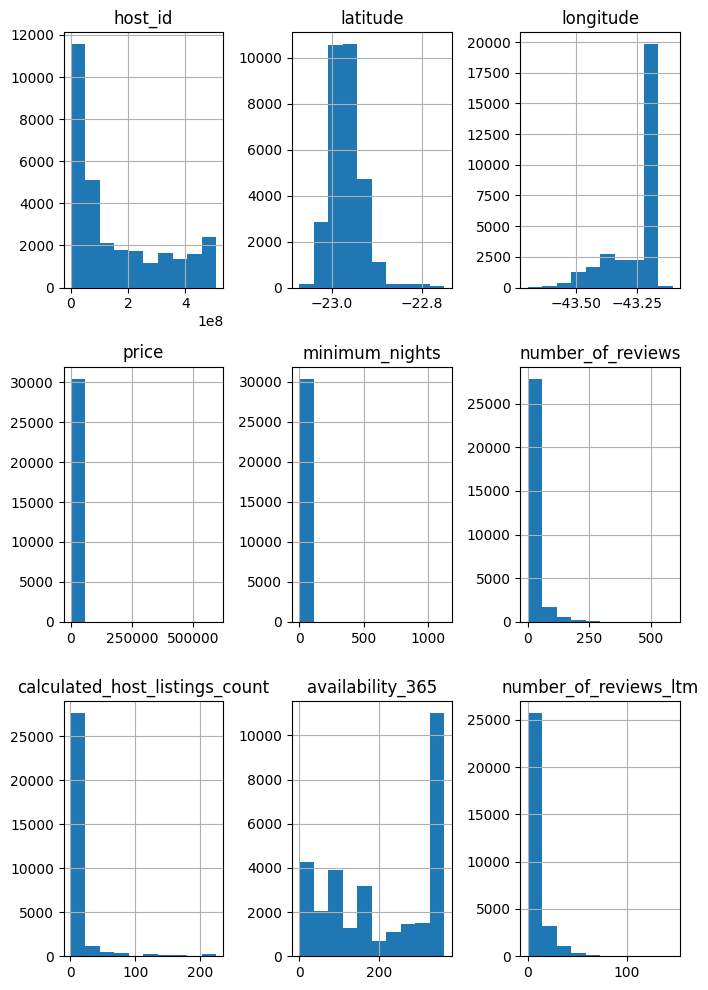

In [ ]:
# Usando o histograma para validar as distruições dos dados, assim ajuda nos intender se há outliner ou não
df.hist(figsize=(7,10))
plt.tight_layout()

As colunas `logitude` e `latitude` não irei considerar nesse momento, pois por mais que apareceram no grafico, elas não são variaveis quantitativas.


---

Olhando os graficos, é perceptivel que há valores *distante da barra maior* o que pode sinalizar que há algumas entradas não dentro do padrão de comportamento aceitavel para a variavel, assim iremos remover essas entradas.


In [ ]:
# resumo estatisco da base
df.describe()

host_id      latitude     longitude          price  \
count  3.045500e+04  30455.000000  30455.000000   30455.000000   
mean   1.568552e+08    -22.967221    -43.250335     981.051880   
std    1.608316e+08      0.035217      0.099716    8627.972592   
min    3.607000e+03    -23.073276    -43.701286       0.000000   
25%    2.083224e+07    -22.984780    -43.308558     200.000000   
50%    8.378613e+07    -22.972630    -43.195520     350.000000   
75%    2.773585e+08    -22.954765    -43.185842     650.000000   
max    5.072126e+08    -22.749690    -43.104400  595793.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    30455.000000       30455.000000                    30455.000000   
mean         4.853193          18.272468                        9.814086   
std         24.361153          38.513135                       28.249500   
min          1.000000           0.000000                        1.000000   
25%          1.000000           1.000000                        1.000000   
50%          2.000000           4.000000                        2.000000   
75%          4.000000          17.000000                        4.000000   
max       1125.000000         588.000000                      224.000000   

       availability_365  number_of_reviews_ltm  
count      30455.000000           30455.000000  
mean         210.380693               6.636283  
std          136.073952              10.832516  
min            0.000000               0.000000  
25%           85.000000               0.000000  
50%          212.000000               2.000000  
75%          359.000000               8.000000  
max          365.000000             146.000000

Esse resumo nos mostra os primeiros problemas da base

* `price` tivemos 0 e 595793 dois estremos de valores que não fazem sentindo, não é comum alugar um imóvel de graça muito menos é viavel alugar um imóvel por um preço tão exurbitante quanto 593 mil por dia (o Q3 foi de 650, outro sinal de que é um outliner
*`minimum_nights` - Q3 nos diz que o mínimo de noites que permitem que fique no imóvel é 4 dias, 1125 é um grande sinal de outliner 
* as variaveis `calculated_host_listings_count`,`number_of_reviews`,`number_of_reviews_ltm` também tem outliners mas não iremos olha-las (pelo menos para esta analise)






## Removendo outliners

Para remover os outliners irei usar o z-score, que é quantas vezes o valor se desviou da média, então se ou valor desviou 3 vezes ou mais, irei descarata

In [ ]:
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price:: ', inf_price)

IQR da variável price:  450.0
Limite superior de price:  1325.0
Limite inferior de price::  -475.0


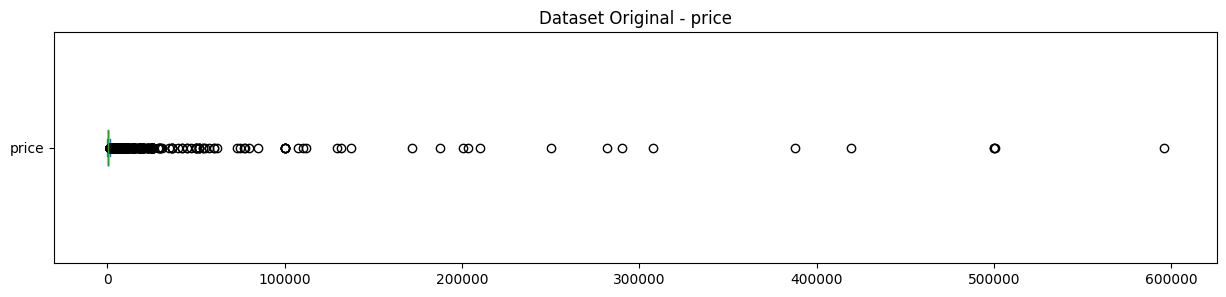

O dataset possui 30455 colunas
2959 Entradas acima de 1325.0
Representam 9.72% do dataset


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 1325.0".format(len(df[df.price > 1325.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 1325]) / df.shape[0])*100))

In [ ]:
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)
                                     
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  3.0
Limite superior de minimum_nights:  8.5
Limite inferior de minimum_nights:  -3.5


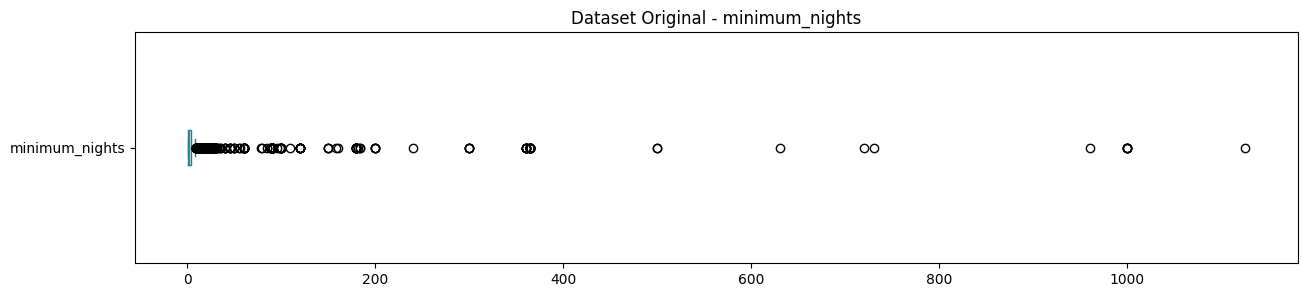

O dataset possui 30455 colunas
1734 Entradas acima de 8.5
Representam 5.69% do dataset


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 8.5".format(len(df[df.minimum_nights > 8.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 8.5]) / df.shape[0])*100))

In [ ]:
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 1325.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 8.5].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)


Shape antes da limpeza:  (30455, 13)
Shape após a limpeza:  (26093, 13)


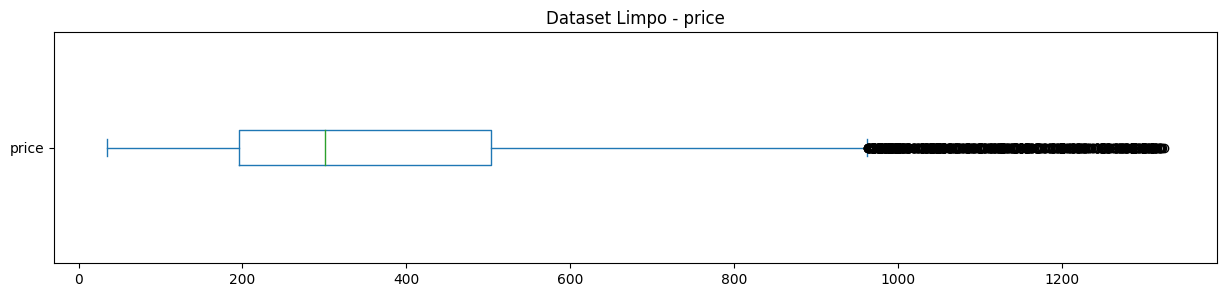

Tamanho original: 30455 linhas
Tamanho atual: 26093 linhas


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} linhas".format(df.shape[0]))
print("Tamanho atual: {} linhas".format(df_clean.shape[0]))

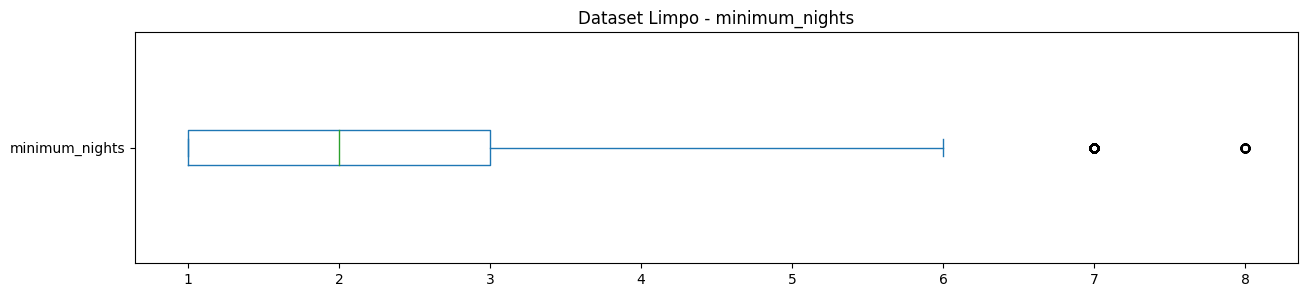

Tamanho original: 30455 linhas
Tamanho atual: 26093 linhas


In [ ]:
df_cleanfig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print("Tamanho original: {} linhas".format(df.shape[0]))
print("Tamanho atual: {} linhas".format(df_clean.shape[0]))

In [ ]:
#novo formato da tabela

print('O base tem '+str(df_clean.shape[0])+' entradas')
print('O base tem '+str(df_clean.shape[1])+' variaveis')

O base tem 26093 entradas
O base tem 13 variaveis


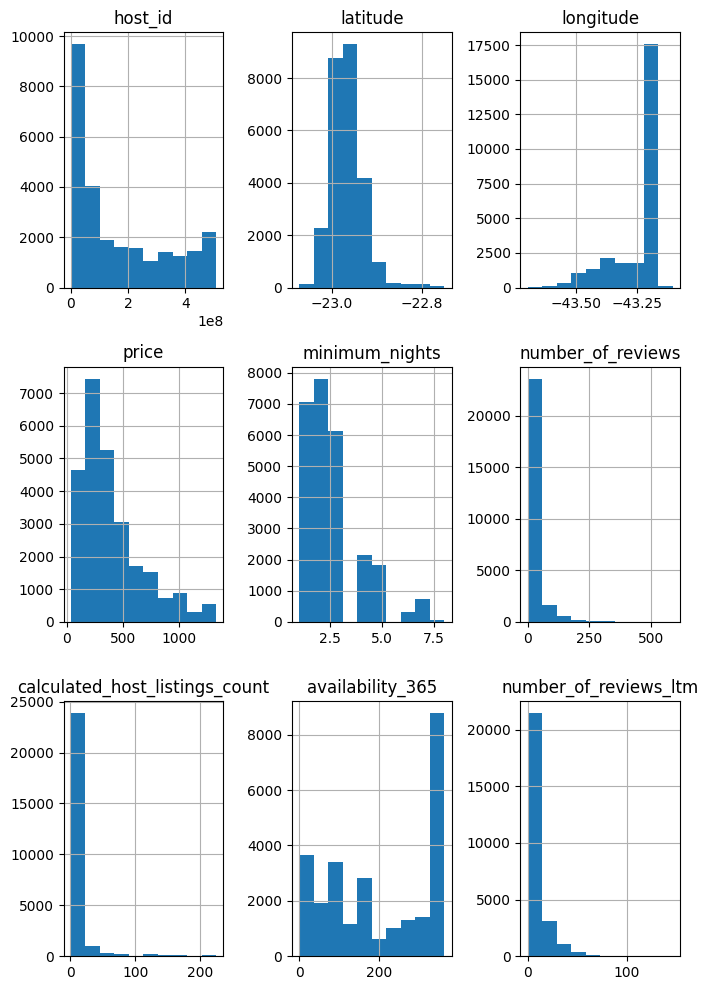

In [ ]:
# Um novo histograma agora com a remoção dos autilines
df_clean.hist(figsize=(7,10))
plt.tight_layout()

## Correlação dos dados
Valos analisar o quanto uma influencia de uma variavel sobre a outra ( a significancia de correlação delas).

Obs: os valores de correlação vão de -1 a 1, se o valor for negativo significa "a variação é inversa na outra variavel", de uma forma mais simple, *enquanto uma cai a outra aumenta vice e versa* se for por positiva as variaveis irão variar para a mesma "direção" ( se uma variavel subir a outra irá também assim vale se uma descer a outra irá descer junto).
Esses valores nos dizem o quanto a variação de uma variavel consegue influenciar na variaçao da outra variavel.

<ipython-input-35-5b9fdde3be6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_clean.corr()


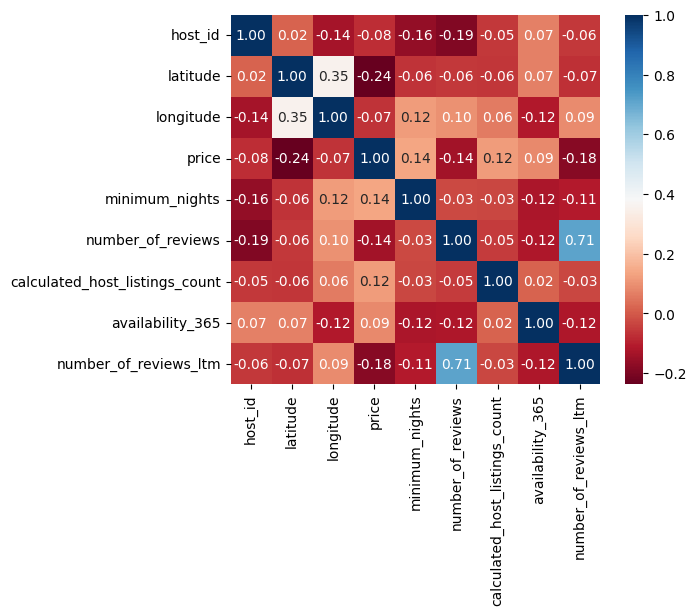

In [ ]:
# Para ilustrar a correlação criarei um gráfico para mostras as correlações
corr=df_clean.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Com exeção das variaveis `numbers_of_reviews` e `numbers_of_reviews_ltm` onde o valor de correlação entre elas foram olatar, podemos perceber que as demais estão longe de ter signficancia no nível que podemos dizer que uma influencia a outra.

## Os bairros mais caros do Rio de Janeiro


In [ ]:
df_bairro=df_clean.groupby('neighbourhood').agg({'price':'mean','host_name':'nunique'})
df_bairro.rename(columns={'host_name':'n_host'},inplace=True)

In [ ]:
df_bairro.nlargest(n=10,columns='price')

price  n_host
neighbourhood                         
Caju                941.500000       2
Complexo do Alemão  900.000000       1
São Conrado         604.487342     122
Praia da Bandeira   575.000000       2
Leblon              557.948822     494
Santíssimo          546.750000       4
Galeão              543.500000       2
Lagoa               535.631579     142
Grumari             530.571429       6
Anchieta            525.000000       2

Muito dos top 10 tem um ou dois host para o bairro, e são bairros onde o preço está muito acima com o da região, por exemplo, *Complexo do Alemão* que uma comunidade, irei remover esses bairros onde tem pouco host

In [ ]:
df_bairro.describe()

price       n_host
count  153.000000   153.000000
mean   293.533483    74.882353
std    141.597691   227.419273
min     62.500000     1.000000
25%    194.333333     4.000000
50%    276.226562     8.000000
75%    370.857143    39.000000
max    941.500000  2216.000000

Para este caso, irie ilimiar todos os bairros que estão acima do Q2, assim consigo eliminar bairros que tem pouca opção de lugares

In [ ]:
df_bairro=df_bairro.loc[df_bairro.n_host>8]

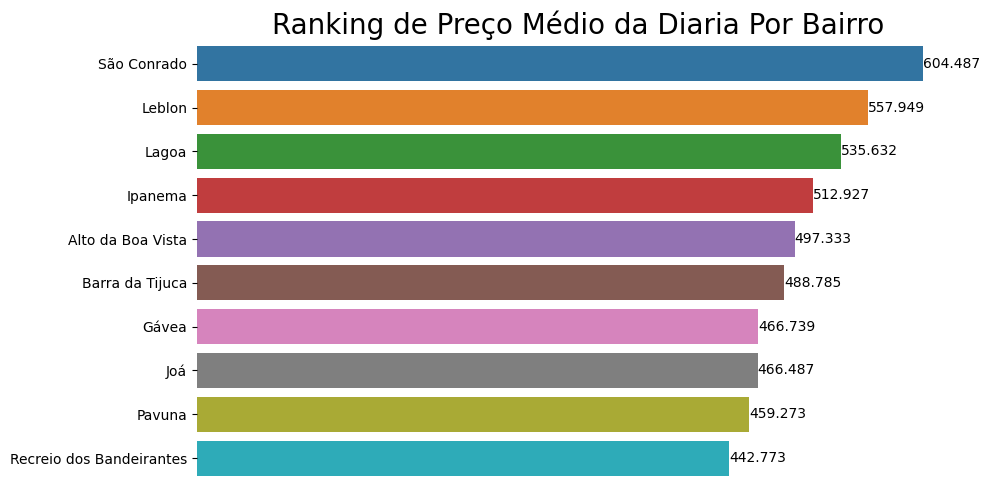

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
x=df_bairro.price.nlargest(n=10)
p=sns.barplot(x=x.values,y=x.index,orient='h')
plt.title('Ranking de Preço Médio da Diaria Por Bairro',fontsize=20)
plt.ylabel('')
ax.bar_label(p.containers[0])
plt.xticks([])
ax.spines[:].set_visible(False)
plt.tight_layout()

### Bairro São Conrado

De acordo com a nossa analise o São Conrado nos mostrou ser o bairro com a diaria mais cara do Rio de Janeiro.

Com a diaria de 604 por noite, São Conrado aprensenta diversos prédios luxuosos, um dos bairros mais ideal para quem gosta de adrenalina, pois se encontra um dos pontos mais bonitos do Rio de Janeiro a Pedra da Gávea e a Pedra Bonita, além do Parque Nacional da Tijuca onde fica as Pedras.

## Os bairros mais baratos do Rio de Janeiro

In [ ]:
df_bairro.nsmallest(n=10,columns='price')

price  n_host
neighbourhood                     
Portuguesa      155.928571      10
Rocinha         161.428571       9
Méier           179.666667      20
Engenho Novo    186.678571      14
Gamboa          192.434783      16
Catumbi         203.250000      12
Madureira       215.555556       9
Centro          227.209052     504
Jardim Sulacap  228.000000       9
Praça Seca      228.571429      10

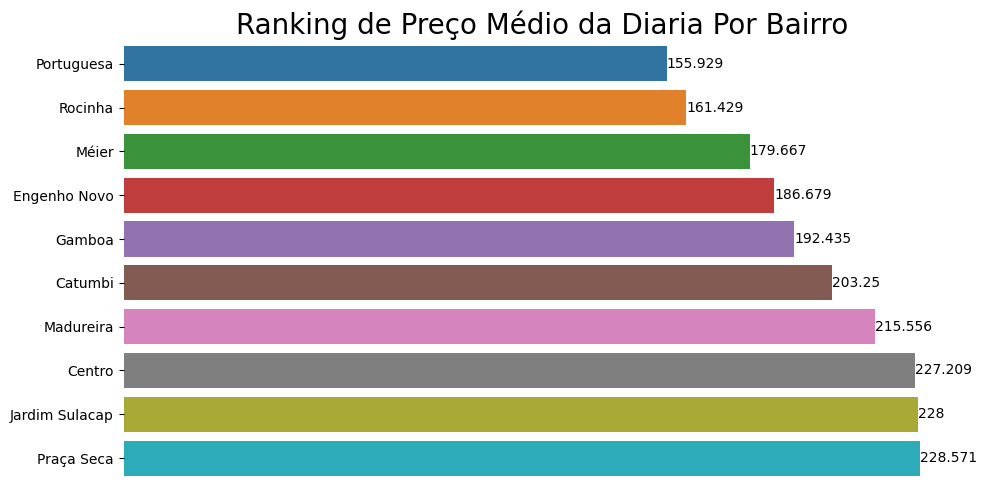

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
x=df_bairro.price.nsmallest(n=10)
p=sns.barplot(x=x.values,y=x.index,orient='h')
plt.title('Ranking de Preço Médio da Diaria Por Bairro',fontsize=20)
plt.ylabel('')
ax.bar_label(p.containers[0])
plt.xticks([])
ax.spines[:].set_visible(False)
plt.tight_layout()

### Bairro Portuguesa

Um Bairro simple dentro dentro da cidade, para turismo é um pouco distante dos princiais pontos, mas é um dos melhores bairros para se morar.

## Principais Região

Ilustarei os bairros que contem mais opção de hospedagem

In [50]:
mapa = folium.Map(location=[ -22.929191844471497, -43.28403570336719], zoom_start= 13)
coordenadas= []
for lat, lng in zip(df_clean.latitude, df_clean.longitude):
    coordenadas.append([lat,lng])
    
mapa.add_child(plugins.MarkerCluster(coordenadas))
mapa

In [70]:
df_bairro2=df_clean.groupby(['neighbourhood']).agg({'price':['mean','max','min'],'host_name':'nunique','availability_365':'mean'})
#dividindo a média de dias disponiveis por 365, apenas para termos uma proporção de quanto isso 
df_bairro2[('availability_365',    'mean')]=df_bairro2[('availability_365','mean')]/365
df_bairro2.nlargest(n=10,columns=('host_name', 'nunique'))

price           host_name availability_365
                                mean   max min   nunique             mean
neighbourhood                                                            
Copacabana                374.351802  1315  50      2216         0.514146
Barra da Tijuca           488.785323  1325  53       891         0.576582
Ipanema                   512.927442  1322  65       814         0.500571
Recreio dos Bandeirantes  442.772908  1310  53       634         0.597551
Botafogo                  333.292863  1309  50       581         0.543021
Jacarepaguá               427.932575  1310  50       553         0.637252
Centro                    227.209052  1300  50       504         0.566441
Leblon                    557.948822  1321  54       494         0.484386
Santa Teresa              273.819604  1300  50       476         0.603637
Flamengo                  330.043406  1320  57       362         0.548050

Uma coisa é clara, dentro das Airbnb, é possivel você pagar qualquer preço, é possivel pagar 1315 reais ou 50 reais na diária, essa decisão cabe a você ponderar, mas se olharmos as médias de preço, temos bairros interessante como *Santa Teresa* um bairro bem antigo, cheio Casarões e um bonde ativo, **um bom lugar para turistar!**

## Conclusão

* A idéia era fazer uma analise simples sobres os dados, por isso que não olhamos as variaveis: `calculated_host_listings_count`,`number_of_reviews`,`number_of_reviews_ltm`, foi do meu entendimento que elas não teriam efeito na analise.

* Por mais simples a analise, foi possível analisar as diarias médias dos bairros, quais bairros são mais concorridos no ano e pode escolher o melhor bairro.

* Não analisei as avaliações nem muito menos as hospedagens, pois não foi interesse desse notebook, no próximo irei usar a base mais completa e aplicarei modelos de machine learn para classificar os imovéis.